In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
call_data = pd.read_csv('911.csv')

In [4]:
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Informaition of the dataframe

In [6]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


top 5 zipcodes for 911 calls

In [12]:
call_data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

top 5 townships (twp) for 911 calls

In [14]:
call_data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Count of unique Elements in Titles series of Dataframe

In [20]:
call_data['title'].nunique()

110

In [15]:
call_data['Reason'] = call_data['title'].apply(lambda x: x.split(':')[0])

Separate Column Reasons added to easily Categorize data.

In [22]:
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Date,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday,2015-12-10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday,2015-12-10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thursday,2015-12-10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thursday,2015-12-10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thursday,2015-12-10,EMS


Number of repetations of each reason

In [54]:
call_data['Reasons'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

Count Plot of reasons for 911 calls. 
Derieved inference: Fire Safety Regulations help reduce such emergencies. Medical emergancy remains the reason for most number of calls. 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


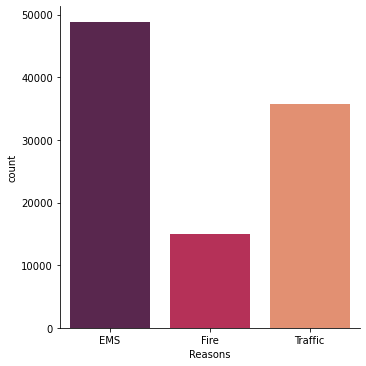

In [61]:
sns.factorplot(x = 'Reasons', kind = 'count', data = call_data, palette= 'rocket')

Passing call_data['timestamp'] would give the data type of entire column which is an object (pandas series object).
So, first element needs to be called to check the element's data type. Any element of the entire column would give the same result, given the assumption data isn't flawed at any point.

In [67]:
type(call_data['timeStamp'][0])


str

In [5]:
call_data['timeStamp'] = pd.to_datetime(call_data['timeStamp'])

Methods, hour, dayofweek and month, are pandas inbuilt methods to extract these data from datetime object created in previous step. it is iterably applied on the entire column by combining apply() and lambda operator.

In [6]:
call_data['Hour'] = call_data['timeStamp'].apply(lambda x: x.hour)
call_data['Month'] = call_data['timeStamp'].apply(lambda x: x.month)
call_data['Day of Week'] = call_data['timeStamp'].apply(lambda x: x.dayofweek)
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3


In [7]:
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

The above defined dictionary will be used to replace day numbers by day name. The map function used here is pandas built in function the checks for dictionary keys and operates corresponding key values on the target.

In [8]:
call_data['Day of Week'] = call_data['Day of Week'].map(dmap)
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thursday


This is count plot showing numbers of calls made each day of week with the reasons as hue.
Derieved inference: While Medical and Fire emergencies don't depend much on the days of week, Traffic emergencies are significantly lower towards the weekends.

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

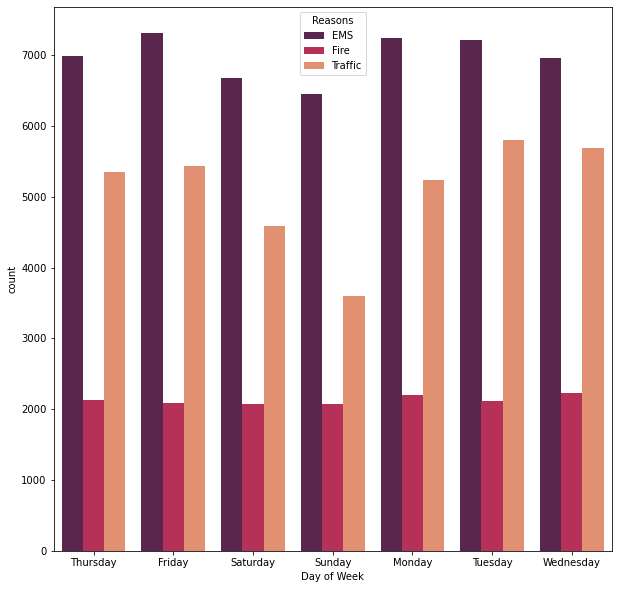

In [119]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Day of Week', data = call_data, palette= 'rocket', hue = 'Reasons')

This plot shows count of calls made in every month with reasons as hue.
Derieved Inference: The month of december has lowest number of emergencies for all reason fields.
The data lacks information about months September, October, November.

<AxesSubplot:xlabel='Month', ylabel='count'>

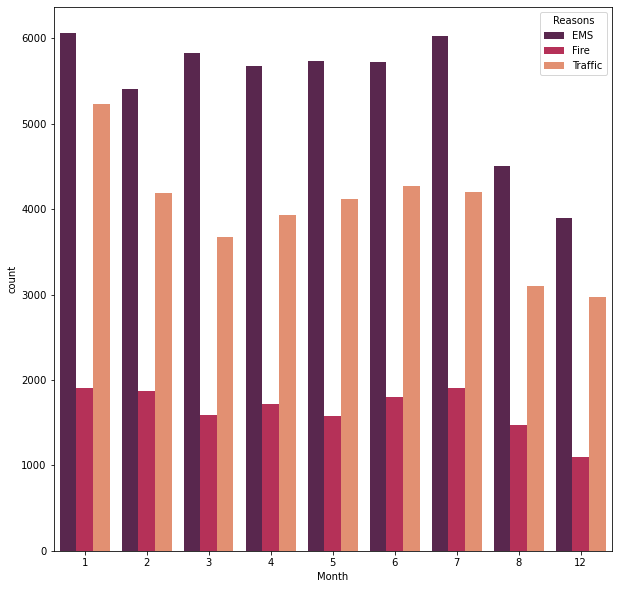

In [120]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Month', data = call_data, palette= 'rocket', hue = 'Reasons')

The data frame created here corresponds to monthwise counts of each column elements in call_data dataframe.

In [9]:
byMonth = call_data.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


The count of calls per month counted using township.

<AxesSubplot:xlabel='Month'>

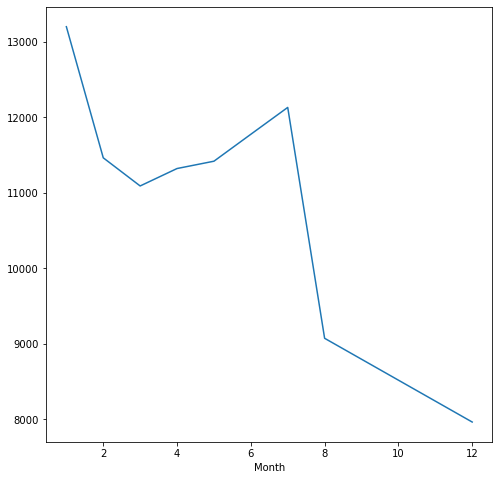

In [122]:
plt.figure(figsize = (8,8))
byMonth['twp'].plot()

Seaborn's inbuilt lmplot() is used to get liner fit equation of above represented data. The data is highly deviated from liner fit.

<Figure size 576x576 with 0 Axes>

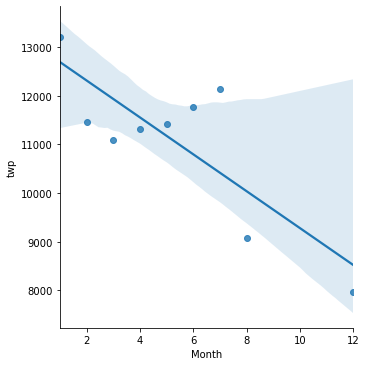

In [129]:
plt.figure(figsize = (8,8))
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

New column date is added to the call_data dataframe.

In [10]:
call_data['Date'] = call_data['timeStamp'].apply(lambda x: x.date())

In [11]:
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thursday,2015-12-10


The data frame created here corresponds to daywise counts of each column elements in call_data dataframe.

In [12]:
byDate = call_data.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
Date,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447


The following plot represents Datewise count of calls.
Derieved Inference: There were hugh number of calls made in February 2016. the reduced significantly afterwards and were at lowest around the end of August.


<AxesSubplot:xlabel='Date'>

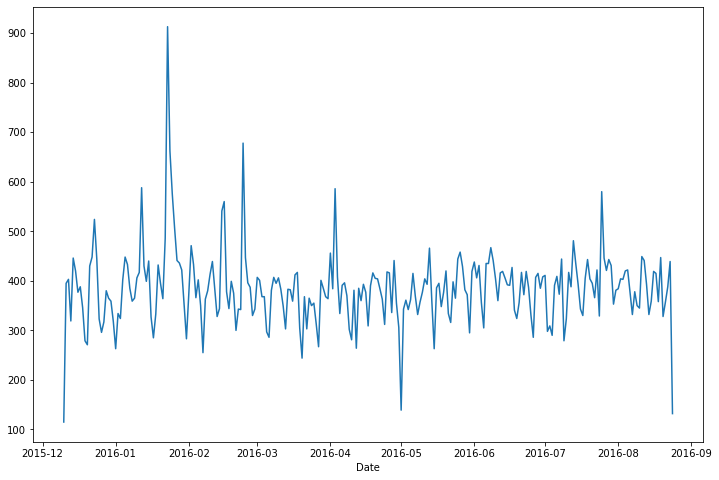

In [134]:
plt.figure(figsize = (12,8))
byDate['twp'].plot()

The following plot represents Datewise count of calls for Traffic emergency related calls.

Text(0.5, 1.0, 'Traffic')

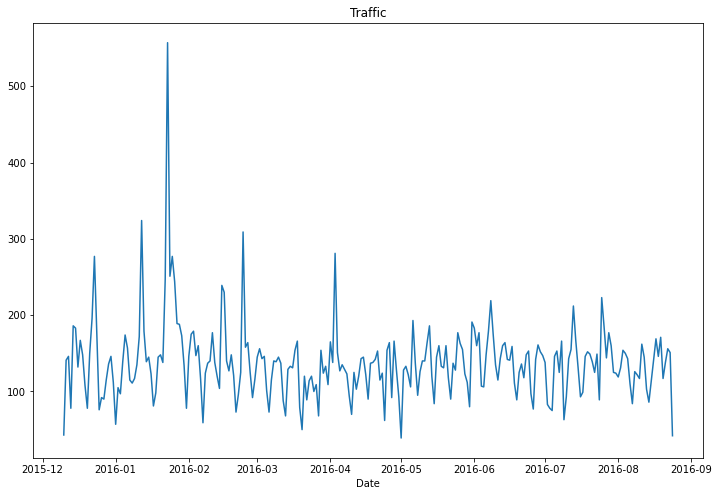

In [17]:
plt.figure(figsize = (12,8))
call_data[call_data['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

The following plot represents Datewise count of calls for Fire emergency related calls

Text(0.5, 1.0, 'Fire')

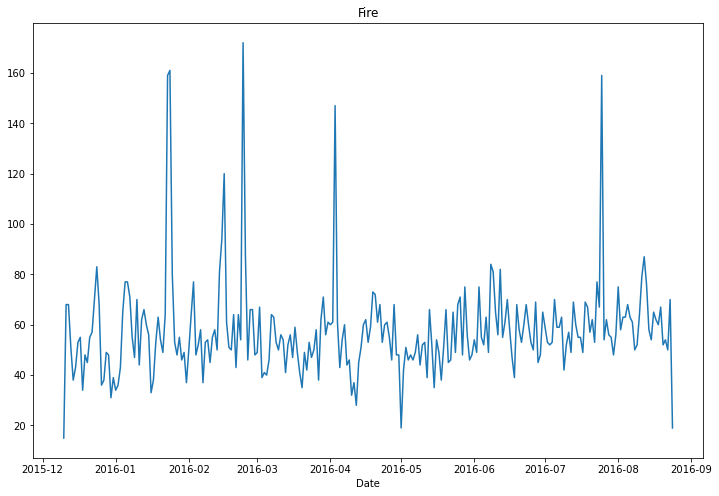

In [18]:
plt.figure(figsize = (12,8))
call_data[call_data['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

The following plot represents Datewise count of calls for Emergency Medical Services related calls

Text(0.5, 1.0, 'EMS')

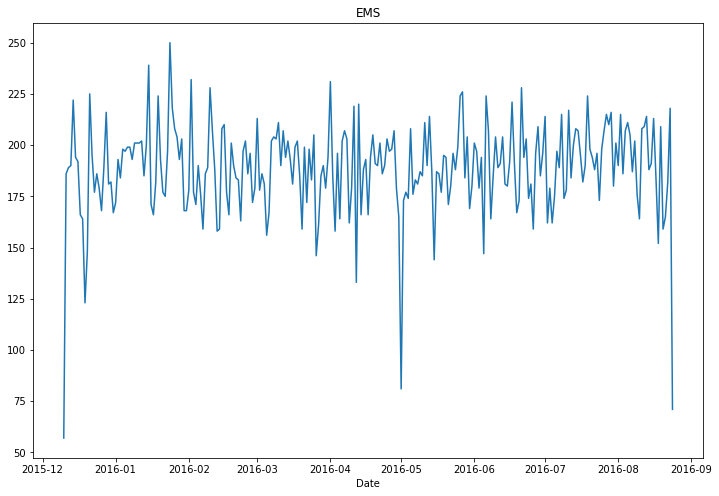

In [19]:
plt.figure(figsize = (12,8))
call_data[call_data['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Thed data is now arranged as counts grouped according to Day of week and Hour at whaich call is made.

In [21]:
matData = call_data.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
matData.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Following is the Heatmap of above data.
Significant number of calls are made during 7 am and 5 pm. The number of calls made decrease towards the weekends.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

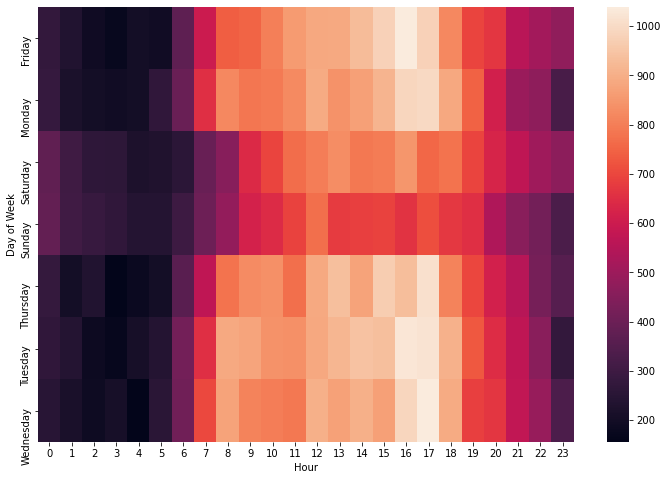

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(matData)

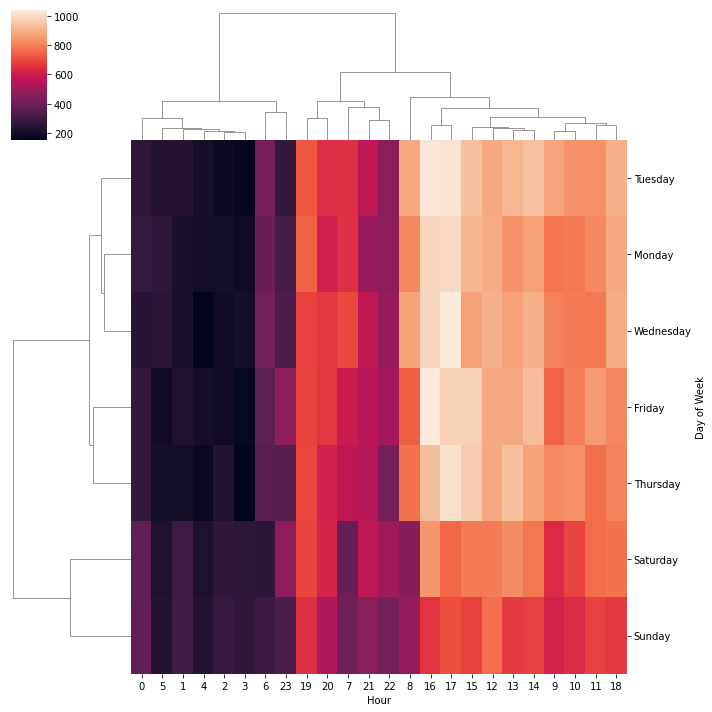

In [39]:
sns.clustermap(matData)

Thed data is now arranged as counts grouped according to Day of week and Month at whaich call is made.

In [41]:
monthData = call_data.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
monthData.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


The following heatmap corresponds to calls made on each day of week for every month.
Weekends of december has lowest number of calls.

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

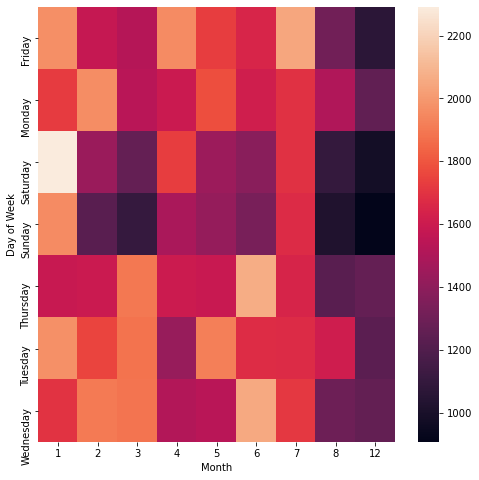

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(monthData)

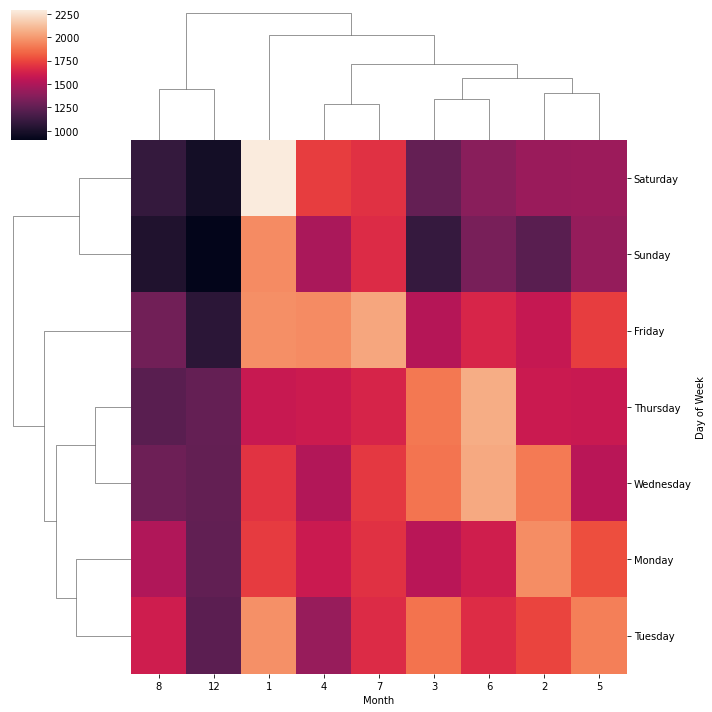

In [49]:
sns.clustermap(monthData)